Loading functions

In [2]:
%load_ext autoreload
%autoreload 2

from utils import *
from dual import *

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### voice data prep

In [2]:
data_voice_cut = load_file('voice500')

In [4]:
#data_voice = pd.read_csv('voice.csv')
#data_voice_cut = data_voice.sample(500)

In [23]:
data_size = len(data_voice_cut.index)

voice_X = data_voice_cut.iloc[:, :-1]
voice_y = data_voice_cut.iloc[:, -1]

# code categories to -1/1
gender_encoder = LabelEncoder()
voice_y = np.array(gender_encoder.fit_transform(voice_y))
voice_y = voice_y * 2 - 1

# normalize data
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(voice_X)
voice_X = np.array(scaler.transform(voice_X))
voice_X = voice_X[:,0:2]

In [9]:
voice_X = np.array([[0, 0.1]])
voice_y = np.array([[1]])
data_size = 1
random = np.array([[-1]])

In [10]:
random = np.array([rd.randint(0, 1) * 2 - 1 for x in range(data_size)])

model: SVC(C=1, kernel='linear')


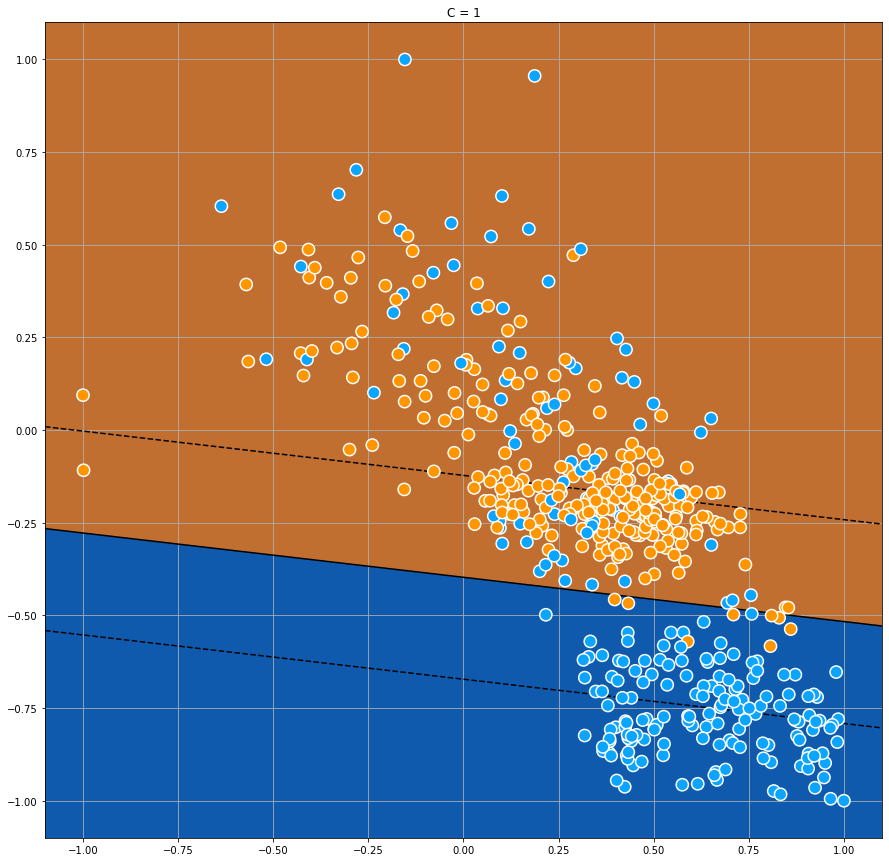

model: [-1.00000000e-12 -4.51327175e-01  1.00000000e+00  1.00000000e+00]
0.0
correlation with the rademacher vector: 23.510783047767077 0.04702156609553416


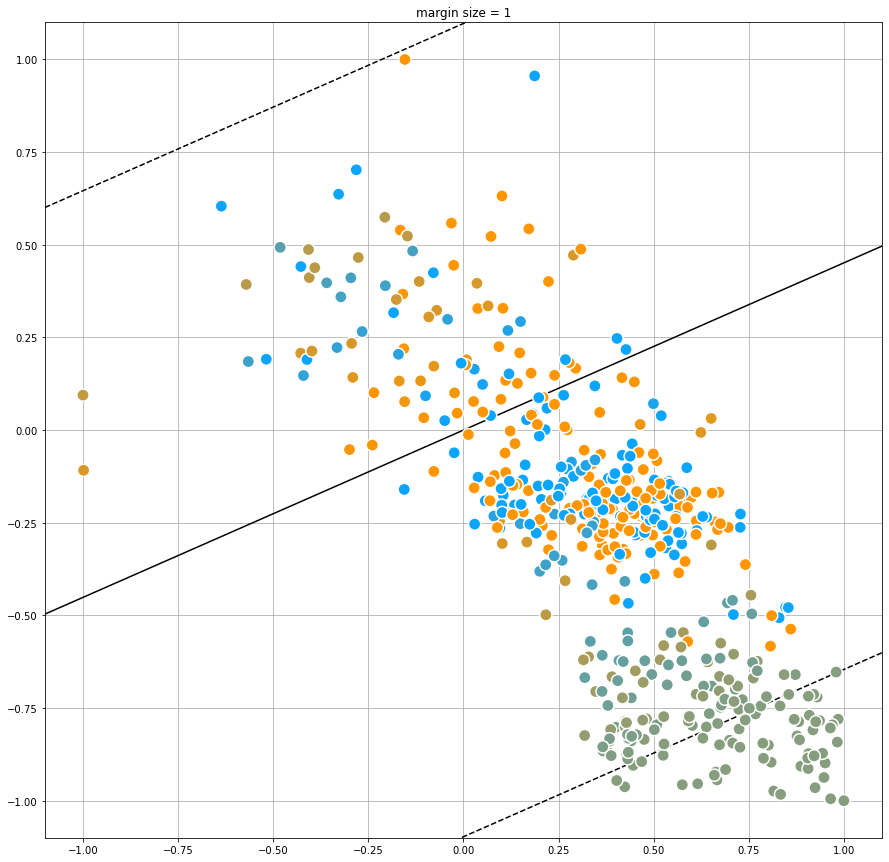

model: [1.00000000e-12 2.13524527e-04 1.25833799e-02]
correlation with the radvec: 6.292595684940093 0.012585191369880185


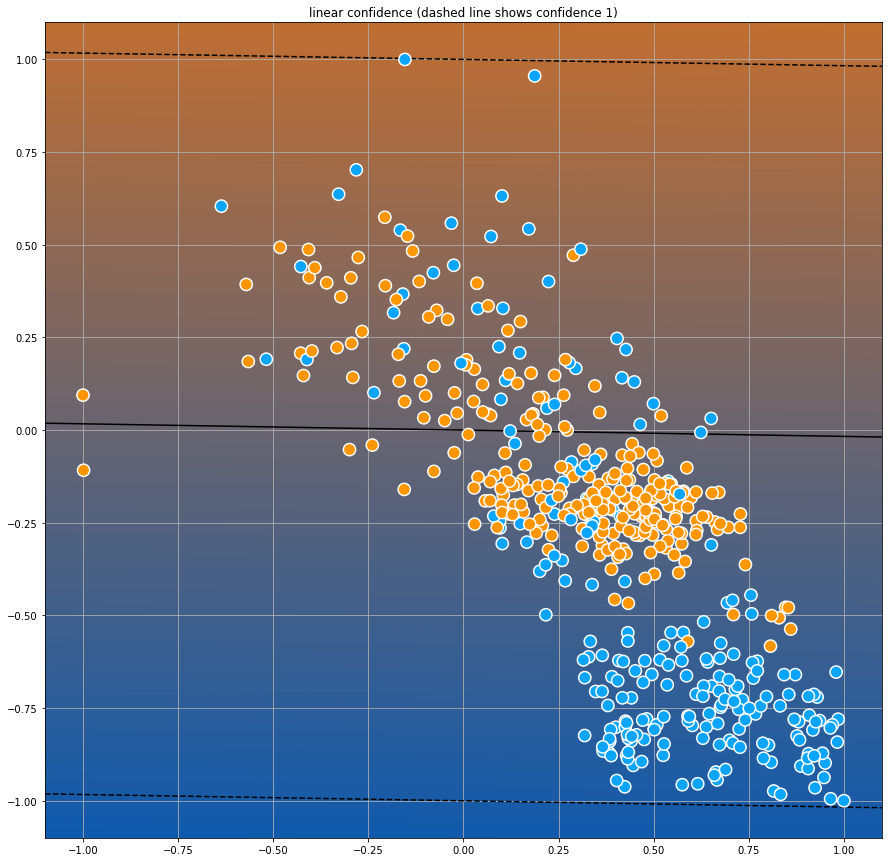

In [25]:
process_dataset(
    X=voice_X, Y=voice_y, radvec=random, model_type="svc",
    margin=1, bounds=1e-12,
    figsize=[15,15], dotsize=150, lim_padding=0.1, color_bar=False, verbose=True)


process_dataset(
    X=voice_X, Y=voice_y, radvec=random, model_type="margin_loss",

    #method='de', kwargs={'popsize':500},
    method='da', kwargs={'maxiter':1000, 'initial_temp':50000, 'accept':-5},
    margin=1, bounds=1e-12,
    figsize=[15,15], dotsize=150, lim_padding=0.1, color_bar=False, verbose=True)


process_dataset(
    X=voice_X, Y=voice_y, radvec=random, model_type="confidence",
    margin=1, bounds=1e-12,
    figsize=[15,15], dotsize=150, lim_padding=0.1, color_bar=False, verbose=True)


# Calculating rademacher for different bounds / margins

In [4]:
BOUNDS = np.array([1e-12, 0.5, 1.0, 2.0])
MARGINS = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    1.1, 1.2, 1.3 , 1.4 , 1.5, 1.6, 1.7, 1.8, 1.9, 2.0])

PUMP_X = voice_X
PUMP_Y = voice_y

runs_per_sample = 1

maxiter = 100
init_temp = 50000
accept = -5

pump_cycles = 50000

folder_name = "voice_2_500_maxiter100"


In [ ]:
for pc in range(pump_cycles):
    for b in BOUNDS:
        print('\n', pc,'/',b, end='// ')

        # generate rademacher vector
        radvec = [rd.randint(0, 1) * 2 - 1 for x in range(PUMP_X.shape[0])]

        ## Calculate Confidence Rademacher Complexity
        DATA_SAVE_NAME = 'histories/'+folder_name+'/confidence_b' + str(b)
        
        try:
            history = load_file(DATA_SAVE_NAME)
        except:
            print('creating new file')
            history = RDhistory('confidence')

        pump_rademacher(PUMP_X, PUMP_Y,
                        history=history,
                        radvec=radvec,
                        runs_per_sample=1,
                        margin=1.0, bounds=b,
                        verbose=False)

        save_file(DATA_SAVE_NAME, history)

        ## Calculate Margin loss Rademacher Complexity for all the margins
        for mar in MARGINS:
            print(mar, end=' ')

            DATA_SAVE_NAME = 'histories/'+folder_name+'/margin_loss_b' + str(b) + '_m' + str(mar)

            try:
                history = load_file(DATA_SAVE_NAME)
            except:
                print('creating new file')
                history = RDhistory('margin_loss')

            pump_rademacher(PUMP_X, PUMP_Y,
                            history=history,
                            radvec=radvec,
                            runs_per_sample=runs_per_sample,
                            margin=mar, bounds=b,
                            verbose=False,
                            method='da', kwargs={'maxiter':maxiter, 'initial_temp':init_temp, 'accept':accept})

            save_file(DATA_SAVE_NAME, history)
            
            
            


 0 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 0 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 0 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 0 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 2 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 2 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 2 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.

 42 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 42 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 42 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 42 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 43 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 43 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 43 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 43 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 44 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 44 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 44 / 1.0// 0.0 0.1 0.2 

 84 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 84 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 84 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 84 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 85 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 85 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 85 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 85 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 86 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 86 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 86 / 1.0// 0.0 0.1 0.2 

 125 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 125 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 126 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 126 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 126 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 126 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 127 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 127 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 127 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 127 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 128 / 1e-12// 0

 167 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 167 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 167 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 167 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 168 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 168 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 168 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 168 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 169 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 169 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 169 / 1.0// 0

 208 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 208 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 209 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 209 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 209 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 209 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 210 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 210 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 210 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 210 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 211 / 1e-12// 0

 250 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 250 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 250 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 250 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 251 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 251 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 251 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 251 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 252 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 252 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 252 / 1.0// 0

 291 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 291 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 292 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 292 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 292 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 292 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 293 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 293 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 293 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 293 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 294 / 1e-12// 0

 333 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 333 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 333 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 333 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 334 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 334 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 334 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 334 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 335 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 335 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 335 / 1.0// 0

 374 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 374 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 375 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 375 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 375 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 375 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 376 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 376 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 376 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 376 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 377 / 1e-12// 0

 416 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 416 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 416 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 416 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 417 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 417 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 417 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 417 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 418 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 418 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 418 / 1.0// 0

 457 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 457 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 458 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 458 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 458 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 458 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 459 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 459 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 459 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 459 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 460 / 1e-12// 0

 499 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 499 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 499 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 499 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 500 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 500 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 500 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 500 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 501 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 501 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 501 / 1.0// 0

 540 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 540 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 541 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 541 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 541 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 541 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 542 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 542 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 542 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 542 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 543 / 1e-12// 0

 582 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 582 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 582 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 582 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 583 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 583 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 583 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 583 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 584 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 584 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 584 / 1.0// 0

 623 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 623 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 624 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 624 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 624 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 624 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 625 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 625 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 625 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 625 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 626 / 1e-12// 0

 665 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 665 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 665 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 665 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 666 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 666 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 666 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 666 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 667 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 667 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 667 / 1.0// 0

 706 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 706 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 707 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 707 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 707 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 707 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 708 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 708 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 708 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 708 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 709 / 1e-12// 0

 748 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 748 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 748 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 748 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 749 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 749 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 749 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 749 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 750 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 750 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 750 / 1.0// 0

 789 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 789 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 790 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 790 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 790 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 790 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 791 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 791 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 791 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 791 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 792 / 1e-12// 0

 831 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 831 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 831 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 831 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 832 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 832 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 832 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 832 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 833 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 833 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 833 / 1.0// 0

 872 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 872 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 873 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 873 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 873 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 873 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 874 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 874 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 874 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 874 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 875 / 1e-12// 0

 914 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 914 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 914 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 914 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 915 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 915 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 915 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 915 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 916 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 916 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 916 / 1.0// 0

 955 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 955 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 956 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 956 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 956 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 956 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 957 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 957 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 957 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 957 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 958 / 1e-12// 0

 997 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 997 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 997 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 997 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 998 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 998 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 998 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 998 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 999 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 999 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 999 / 1.0// 0

 1038 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1038 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1038 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1038 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1039 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1039 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1039 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1039 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1040 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1040 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 104

 1079 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1079 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1079 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1079 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1080 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1080 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1080 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1080 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1081 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1081 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 108

 1120 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1120 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1120 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1120 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1121 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1121 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1121 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1121 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1122 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1122 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 112

 1161 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1161 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1161 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1161 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1162 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1162 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1162 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1162 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1163 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1163 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 116

 1202 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1202 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1202 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1202 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1203 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1203 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1203 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1203 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1204 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1204 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 120

 1243 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1243 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1243 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1243 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1244 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1244 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1244 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1244 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1245 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1245 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 124

 1284 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1284 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1284 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1284 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1285 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1285 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1285 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1285 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1286 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1286 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 128

 1325 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1325 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1325 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1325 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1326 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1326 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1326 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1326 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1327 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1327 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 132

 1366 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1366 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1366 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1366 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1367 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1367 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1367 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1367 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1368 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1368 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 136

 1407 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1407 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1407 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1407 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1408 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1408 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1408 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1408 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1409 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1409 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 140

 1448 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1448 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1448 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1448 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1449 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1449 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1449 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1449 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1450 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1450 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 145

 1489 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1489 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1489 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1489 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1490 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1490 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1490 / 1.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1490 / 2.0// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1491 / 1e-12// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 1491 / 0.5// 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 
 149

# Visualizing Rad. complexity (new method)

### 4 features, 500 points, maxiter 100

0.037336279808474405
0.597562117241594


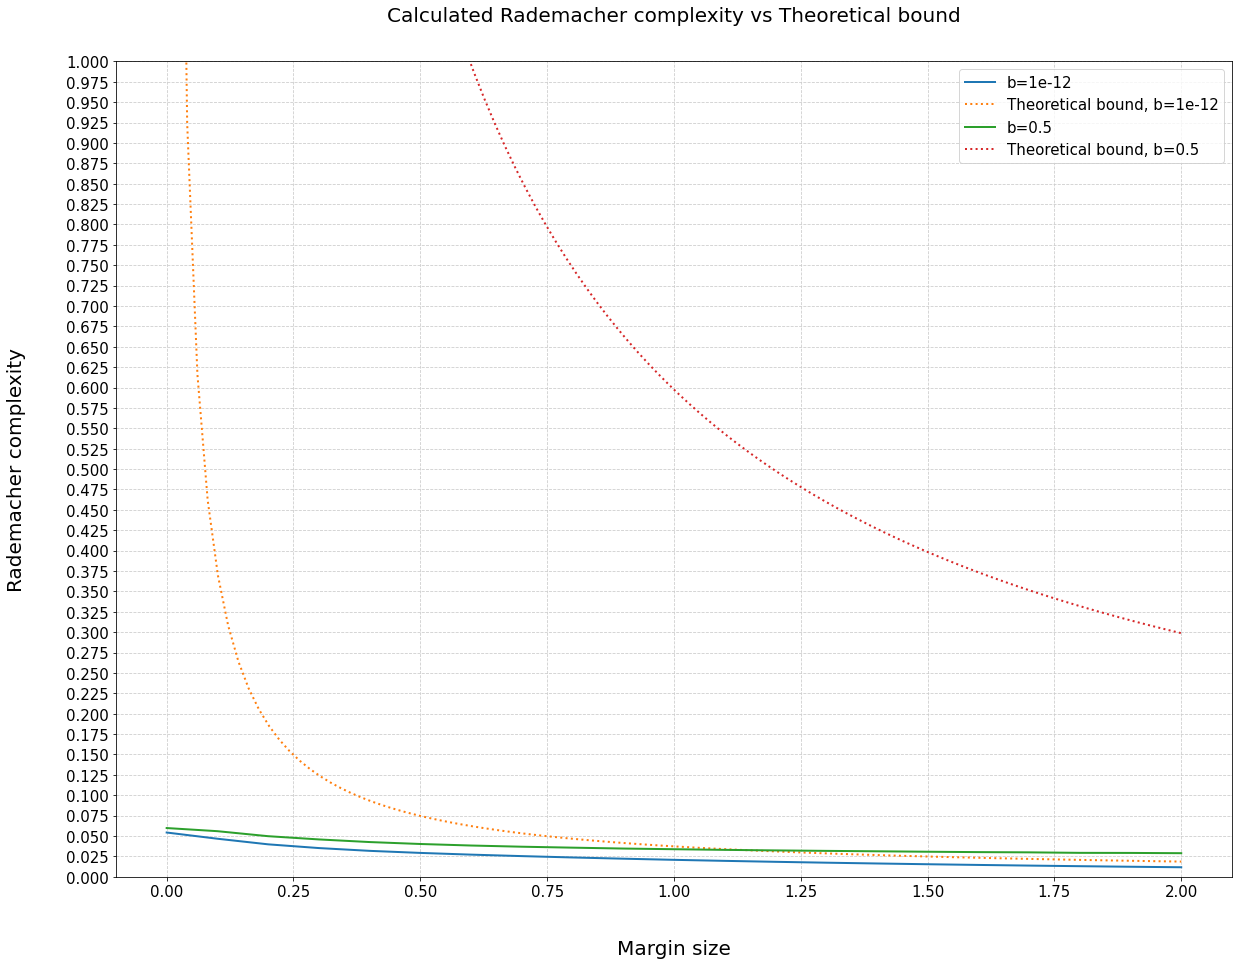

In [3]:
import matplotlib.cm as cm

folder_name = "voice_4_500_maxiter100"

VIS_BOUNDS = np.array([1e-12, 0.5])
VIS_MARGINS = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    1.1, 1.2, 1.3 , 1.4 , 1.5, 1.6, 1.7, 1.8, 1.9, 2.0])

from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

fig, ax = plt.subplots(figsize=[20,15])

#plt.figure(figsize=[20,15])

for VIS_BOUND in VIS_BOUNDS:
    
    color_val = VIS_BOUND * 5
    
    com = []
    for mar in VIS_MARGINS:
        
        h = load_file('histories/'+folder_name+'/margin_loss_b' + str(VIS_BOUND) + '_m' + str(mar))
        com.append(calc_complexity(h))
    
    linear_rad = calc_complexity( load_file('histories/'+folder_name+'/confidence_b' + str(VIS_BOUND)) )
    print(linear_rad)
    
    color_main = cm.Oranges(color_val)
    color_sub = cm.Blues(color_val)
    
    plt.plot(VIS_MARGINS, com, lw=2, label="b="+str(VIS_BOUND))
    sp = np.linspace(0,2,100)
    yy = np.ones(len(sp)-1)*(linear_rad)/sp[1:]
    yy = np.insert(yy,0,None)
    plt.plot(sp, yy, lw=2, label="Theoretical bound, b="+str(VIS_BOUND), ls=':')

plt.ylim(0,1)
#plt.xlim(-0.5,2.5)


ax.minorticks_on()
ax.grid(True, which='both')

ax.xaxis.set_major_locator(MultipleLocator(0.25))
ax.yaxis.set_major_locator(MultipleLocator(0.025))

ax.xaxis.set_minor_locator(AutoMinorLocator(0.5))
ax.yaxis.set_minor_locator(AutoMinorLocator(0.05))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':',lw=3)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.xlabel("Margin size", fontsize=20, labelpad=40)
plt.ylabel("Rademacher complexity", fontsize=20, labelpad=40)
plt.title("Calculated Rademacher complexity vs Theoretical bound", fontsize=20, pad=40)

plt.savefig("images/"+folder_name+"_comlexity_comparison.png")

plt.show()


### 2 features, 500 points,  maxiter 100

0.026099325075350198
1.0955583938937437
1.9801473113119643


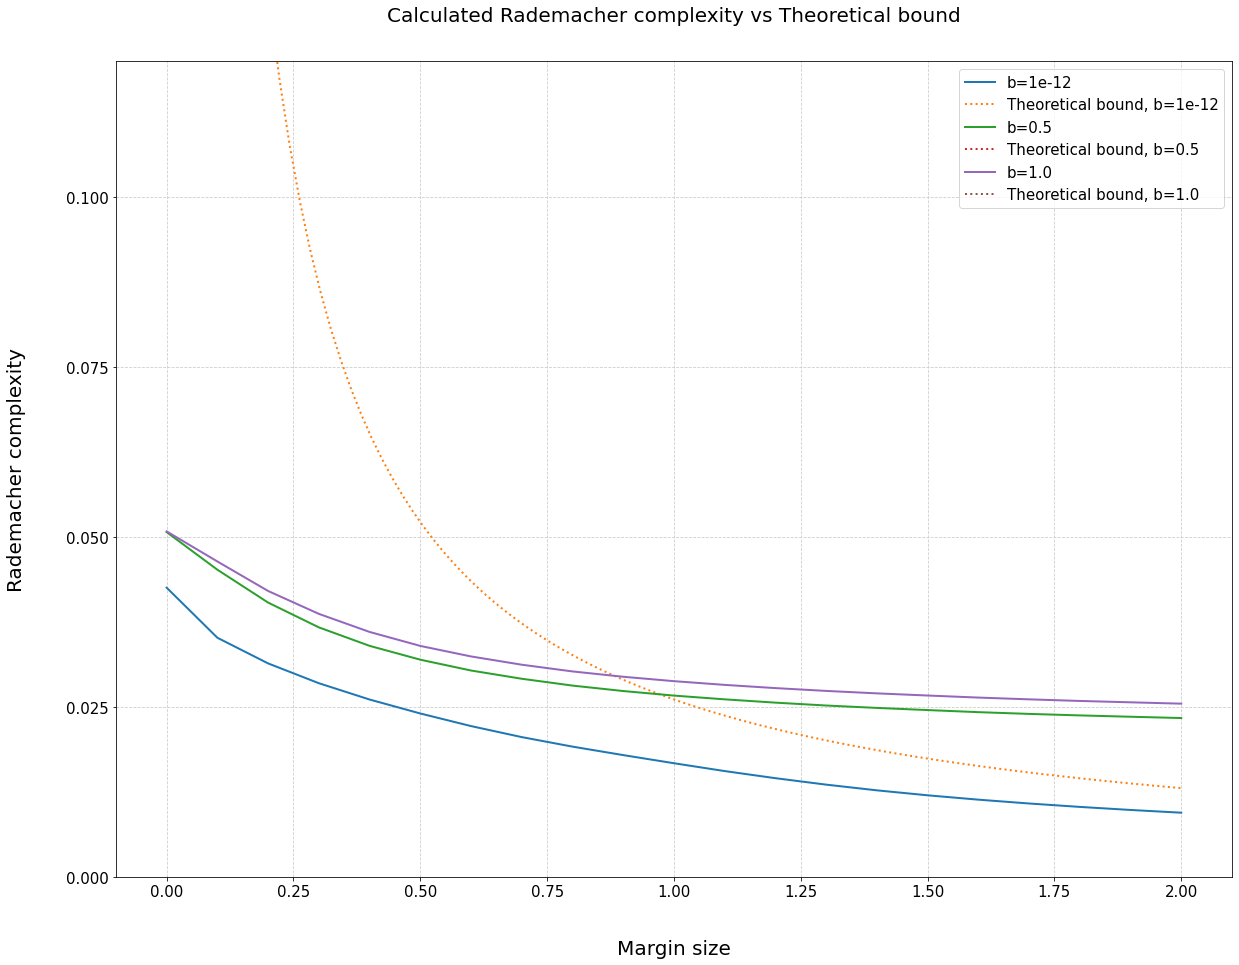

In [5]:
import matplotlib.cm as cm

folder_name = "voice_2_500_maxiter100"

VIS_BOUNDS = np.array([1e-12, 0.5, 1.0])
VIS_MARGINS = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    1.1, 1.2, 1.3 , 1.4 , 1.5, 1.6, 1.7, 1.8, 1.9, 2.0])

from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

fig, ax = plt.subplots(figsize=[20,15])

#plt.figure(figsize=[20,15])

for VIS_BOUND in VIS_BOUNDS:
    
    color_val = VIS_BOUND * 5
    
    com = []
    for mar in VIS_MARGINS:
        
        h = load_file('histories/'+folder_name+'/margin_loss_b' + str(VIS_BOUND) + '_m' + str(mar))
        com.append(calc_complexity(h))
    
    linear_rad = calc_complexity( load_file('histories/'+folder_name+'/confidence_b' + str(VIS_BOUND)) )
    print(linear_rad)
    
    color_main = cm.Oranges(color_val)
    color_sub = cm.Blues(color_val)
    
    plt.plot(VIS_MARGINS, com, lw=2, label="b="+str(VIS_BOUND))
    sp = np.linspace(0,2,100)
    yy = np.ones(len(sp)-1)*(linear_rad)/sp[1:]
    yy = np.insert(yy,0,None)
    plt.plot(sp, yy, lw=2, label="Theoretical bound, b="+str(VIS_BOUND), ls=':')

plt.ylim(0,0.12)
#plt.xlim(-0.5,2.5)


ax.minorticks_on()
ax.grid(True, which='both')

ax.xaxis.set_major_locator(MultipleLocator(0.25))
ax.yaxis.set_major_locator(MultipleLocator(0.025))

ax.xaxis.set_minor_locator(AutoMinorLocator(0.5))
ax.yaxis.set_minor_locator(AutoMinorLocator(0.05))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':',lw=3)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.xlabel("Margin size", fontsize=20, labelpad=40)
plt.ylabel("Rademacher complexity", fontsize=20, labelpad=40)
plt.title("Calculated Rademacher complexity vs Theoretical bound", fontsize=20, pad=40)

plt.savefig("images/"+folder_name+"_comlexity_comparison.png")

plt.show()


# Phi function calc

In [35]:
def _Phi_sub(params, args_list):
    # difference of expected values between whole set / subset
    
    angle = params[0]
    intercept = params[1]
    
    X = args_list[0] # whole data S1
    Y = args_list[1] # labels on S1
    mask = args_list[2] # subset S2 (binary mask)
    N = args_list[3] # size of S1
    M = args_list[4] # size of S2
    margin_size = args_list[5] # margin size for the hyperplane
    
    
    vec = np.asarray([np.cos(angle), np.sin(angle)])
    if (margin_size == 0):
        distances_S1 = - ( Y * np.sign( np.dot((X - vec * intercept), vec) ) )
        distances_S2 = distances_S1 * mask
    else:
        distances_S1 = - ( Y * np.dot( (X - vec * intercept), vec ) ) / margin_size  
        distances_S1[distances_S1<-1] = -1
        distances_S1[distances_S1>1] = 1
        distances_S2 = distances_S1 * mask
        
    return ( np.sum(distances_S2) / M - np.sum(distances_S1) / N )

In [36]:
def _Phi(Set, Mask, margin_size, bounds, popsize=50, verbose=False):
    N = len(Set.index)
    M = np.sum(Mask)
    
    Set_x = Set.drop('class', axis=1)
    Set_y = Set['class']
    
    # Use stochastic method
    st_bounds = [(0,np.pi * 2), (-bounds,bounds)]
    result = differential_evolution(_Phi_sub, st_bounds,
                                    args=([Set_x,Set_y,Mask,N,M,margin_size],), popsize=popsize, disp=verbose)
    
    return result

In [108]:
data = data_seeds

steps = 500

BOUNDS = [0.5, 1.0]
POPSIZE = 50

MARGINS = np.array([ 0., 0.2, 0.4, 0.6, 0.8, 1.0, 1.5, 2.0 ])

In [ ]:
for b in BOUNDS:
    for mar in MARGINS:
        
        DATA_SAVE_NAME = 'histories/seeds_phi/seeds_phi_m' + str(mar) + '_b' + str(b) + '_p' + str(POPSIZE)
        
        try:
            history = load_file(DATA_SAVE_NAME)
        except:
            history = list()
        
        for i in range(steps):
            Mask = np.random.randint(2, size=len(data.index))
            res = _Phi(data, Mask, mar, b, popsize=popsize)
            print(i, res.fun)
            history.append(-res.fun)
            
        save_file(DATA_SAVE_NAME, history)

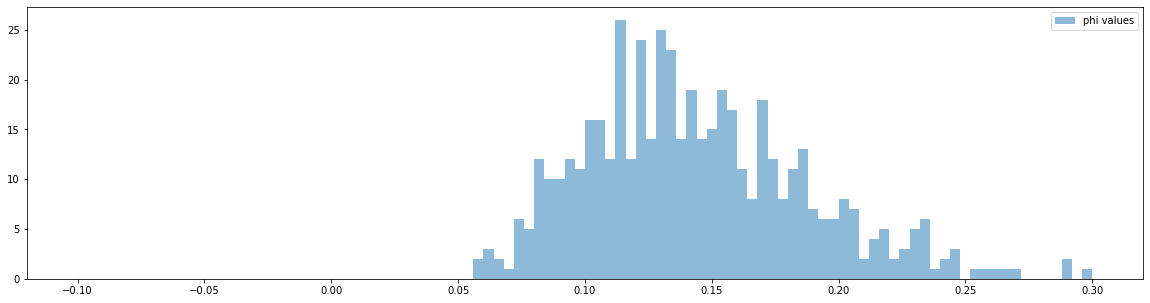

In [30]:
plt.figure(figsize=[20,5])
plt.hist( test, bins=100, range=[-0.1,0.3], label="phi values", alpha=0.5, density=False)
#plt.hist( phi_total2[1], bins=100, range=[-0.1,0.3], label="phi values", alpha=0.5, density=False)
#plt.hist( phi_total2[5], bins=100, range=[-0.1,0.3], label="phi values", alpha=0.5, density=False)
plt.legend(loc='upper right')
plt.show()

## visualizing expectation of phi depending on margin size

0.023605690207310008
0.05744996531284167
0.09187870541250474


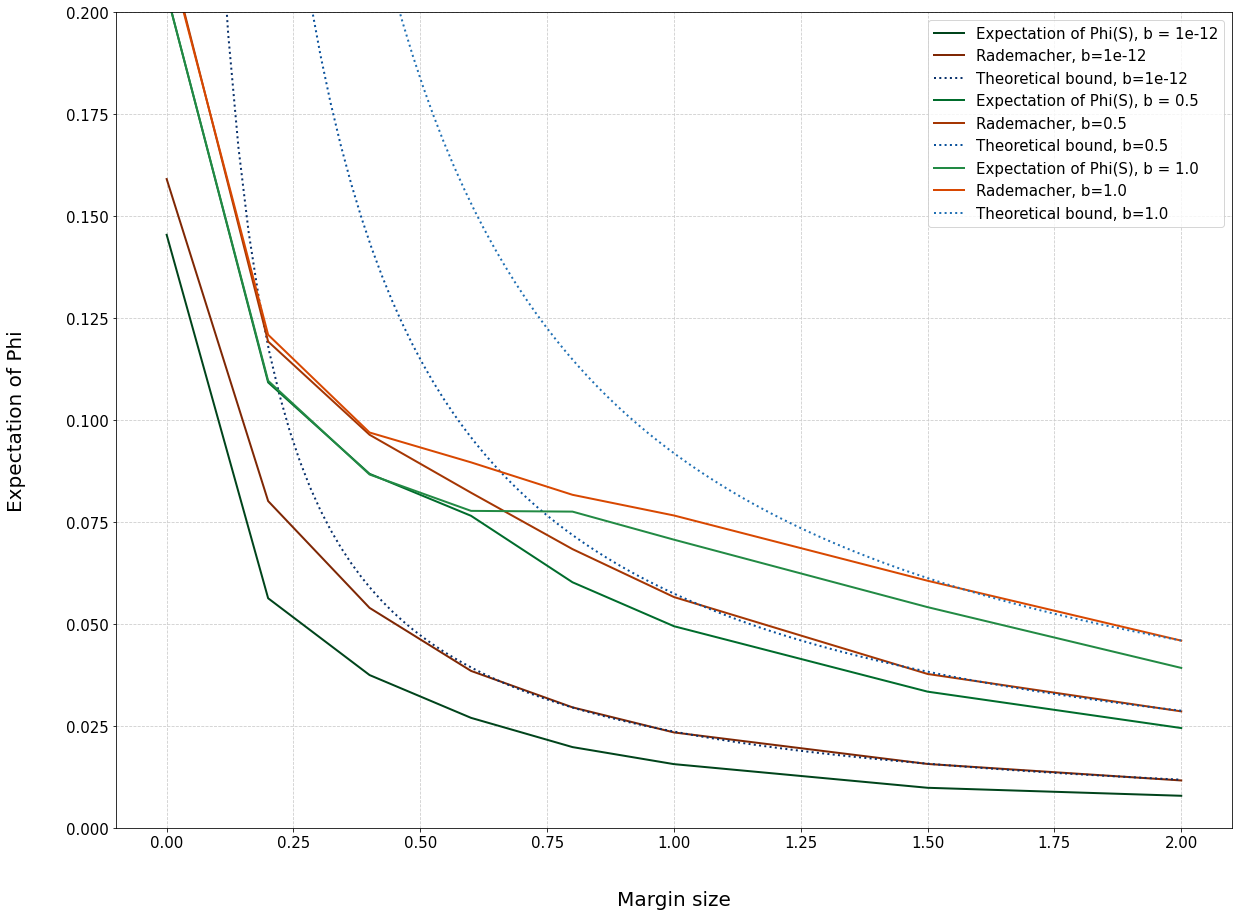

In [114]:
VIS_BOUNDS = [1e-12, 0.5, 1.0]
VIS_MARGINS = np.array([ 0., 0.2, 0.4, 0.6, 0.8, 1.0, 1.5, 2.0 ])

from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

fig, ax = plt.subplots(figsize=[20,15])

# for VIS_BOUND in VIS_BOUNDS:


plt.ylim(0,0.2)
#plt.xlim(-0.5,2.5)

ax.minorticks_on()
ax.grid(True, which='both')

ax.xaxis.set_major_locator(MultipleLocator(0.25))
ax.yaxis.set_major_locator(MultipleLocator(0.025))

ax.xaxis.set_minor_locator(AutoMinorLocator(0.5))
ax.yaxis.set_minor_locator(AutoMinorLocator(0.05))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':',lw=3)



plt.xlabel("Margin size", fontsize=20, labelpad=40)
plt.ylabel("Expectation of Phi", fontsize=20, labelpad=40)
# plt.title("Calculated Rademacher complexity vs Theoretical bound", fontsize=20, pad=40)


for b in VIS_BOUNDS:
    
    color_val = 1 - b / 4
    
    # calc averages
    run = []
    for m in VIS_MARGINS:
        DATA_LOAD_NAME = 'histories/seeds_phi/seeds_phi_m' + str(m) + '_b' + str(b) + '_p' + str(POPSIZE)
        run.append(np.mean(load_file(DATA_LOAD_NAME)))
    
    color_phi = cm.Greens(color_val)
    
    plt.plot(VIS_MARGINS, np.array(run), lw=2, label="Expectation of Phi(S), b = "+str(b), c=color_phi)

    
    
    ####
    
    com = []
    for k in VIS_MARGINS:
        h = load_file('histories/seeds/seeds_m' + str(k) + '_b' + str(b) + '_p' + str(POPSIZE))
        com.append(calc_complexity(h))
    
    linear_rad = calc_complexity(load_file('histories/seeds/seeds_m-1.0_b' + str(b) + '_p' + str(POPSIZE)))
    print(linear_rad)
    
    

    color_main = cm.Oranges(color_val)
    color_sub = cm.Blues(color_val)
    
    plt.plot(VIS_MARGINS, com, lw=2, c=color_main, label="Rademacher, b="+str(b))
    sp = np.linspace(0,2,100)
    yy = np.ones(len(sp)-1)*(linear_rad)/sp[1:]
    yy = np.insert(yy,0,None)
    plt.plot(sp, yy, lw=2,  c=color_sub, label="Theoretical bound, b="+str(b), ls=':')
    
    

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
    

plt.savefig("images/phi_calc.png")

plt.show()


## Plotting dual SVM

### Poly

     pcost       dcost       gap    pres   dres
 0:  1.2027e+06 -7.0990e+07  1e+08  5e-01  2e-12
 1:  1.8588e+06 -1.1569e+07  1e+07  7e-12  7e-12
 2:  1.6049e+05 -1.4482e+06  2e+06  3e-12  2e-12
 3:  2.3973e+03 -2.3424e+05  2e+05  2e-12  1e-12
 4: -1.0837e+04 -9.4652e+04  8e+04  2e-12  2e-12
 5: -1.5905e+04 -4.2643e+04  3e+04  5e-13  2e-12
 6: -1.9294e+04 -3.6312e+04  2e+04  2e-13  1e-12
 7: -2.1459e+04 -3.0944e+04  9e+03  9e-13  2e-12
 8: -2.1989e+04 -2.8560e+04  7e+03  2e-16  1e-12
 9: -2.3617e+04 -2.5127e+04  2e+03  2e-13  2e-12
10: -2.3797e+04 -2.4626e+04  8e+02  5e-12  2e-12
11: -2.4032e+04 -2.4276e+04  2e+02  9e-12  2e-12
12: -2.4105e+04 -2.4176e+04  7e+01  1e-12  2e-12
13: -2.4131e+04 -2.4142e+04  1e+01  1e-12  2e-12
14: -2.4136e+04 -2.4136e+04  2e-01  1e-12  2e-12
15: -2.4136e+04 -2.4136e+04  2e-03  2e-12  2e-12
Optimal solution found.
40 support vectors out of 140 points
training accuracy: 131 out of 140


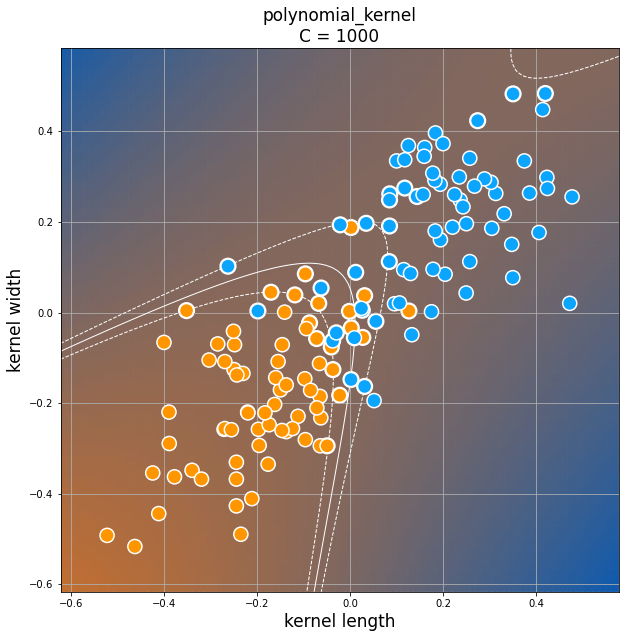

In [102]:
data = data_seeds

X = data.drop('class', axis=1)
y = data['class']

dual(X, y, kernel=polynomial_kernel, C=1000, figsize=[10,10], dotsize=200, padding=0.1, save_path=None, fontsize=17)

# Animation
#for c in np.logspace(-1, 5, 50):
#    dual(X, y, kernel=polynomial_kernel, C=c, figsize=[15,15], dotsize=200, padding=0.1, save_path='images/seeds_poly/', fontsize=17)

### Gaussian

     pcost       dcost       gap    pres   dres
 0:  5.7153e+06 -4.0925e+07  5e+07  2e-13  3e-12
 1:  1.5242e+06 -3.2543e+06  5e+06  5e-13  3e-12
 2:  2.0868e+05 -5.8450e+05  8e+05  5e-13  2e-12
 3:  8.9719e+02 -1.2498e+05  1e+05  2e-13  2e-12
 4: -1.3271e+04 -8.0179e+04  7e+04  1e-12  2e-12
 5: -1.9596e+04 -4.2916e+04  2e+04  2e-12  2e-12
 6: -2.1413e+04 -4.2996e+04  2e+04  2e-16  1e-12
 7: -2.3498e+04 -3.8580e+04  2e+04  4e-12  2e-12
 8: -2.5301e+04 -3.6797e+04  1e+04  1e-12  2e-12
 9: -2.5989e+04 -3.5395e+04  9e+03  4e-12  2e-12
10: -2.7242e+04 -3.2440e+04  5e+03  2e-12  2e-12
11: -2.7443e+04 -3.1225e+04  4e+03  5e-13  2e-12
12: -2.7635e+04 -3.1043e+04  3e+03  3e-12  2e-12
13: -2.8524e+04 -2.9794e+04  1e+03  5e-13  2e-12
14: -2.8884e+04 -2.9230e+04  3e+02  5e-12  2e-12
15: -2.9012e+04 -2.9055e+04  4e+01  5e-12  2e-12
16: -2.9030e+04 -2.9030e+04  5e-01  4e-12  2e-12
17: -2.9030e+04 -2.9030e+04  5e-03  7e-12  2e-12
Optimal solution found.
71 support vectors out of 140 points
training 

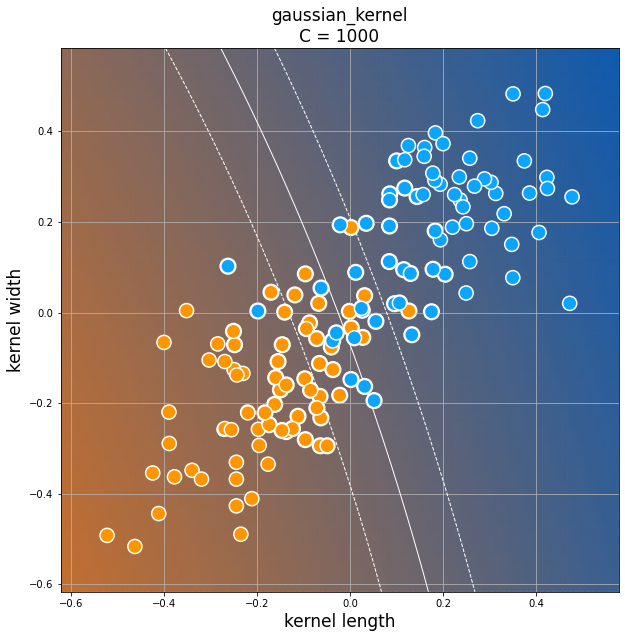

In [85]:
dual(X, y, kernel=gaussian_kernel, C=1000, figsize=[10,10], dotsize=200, padding=0.1, save_path=None, fontsize=17)

# Animation
#for c in np.logspace(-1, 5, 50):
#    dual(X, y, kernel=gaussian_kernel, C=c, figsize=[15,15], dotsize=200, padding=0.1, save_path='images/seeds_gauss/', fontsize=17)

### Synthetic data (gaussian)

In [89]:
def gen_non_lin_separable_data():
        mean1 = [-1, 2]
        mean2 = [1, -1]
        mean3 = [4, -4]
        mean4 = [-4, 4]
        cov = [[1.0,0.8], [0.8, 1.0]]
        X1 = np.random.multivariate_normal(mean1, cov, 50)
        X1 = np.vstack((X1, np.random.multivariate_normal(mean3, cov, 50)))
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 50)
        X2 = np.vstack((X2, np.random.multivariate_normal(mean4, cov, 50)))
        return X1, y1, X2, y2

def split_train(X1, y1, X2, y2):
        X1_train = X1[:90]
        y1_train = y1[:90]
        X2_train = X2[:90]
        y2_train = y2[:90]
        X_train = np.vstack((X1_train, X2_train))
        y_train = np.hstack((y1_train, y2_train))
        return X_train, y_train
    
X1, y1, X2, y2 = gen_non_lin_separable_data()
X_train, y_train = split_train(X1, y1, X2, y2)

dual(X_train, y_train, kernel=gaussian_kernel, C=100, figsize=[15,15], fontsize=15, dotsize=200, padding=0.1, color_bar=False, verbose=True)

     pcost       dcost       gap    pres   dres
 0:  5.3664e+04 -4.2772e+05  7e+05  2e-01  6e-14
 1:  2.6217e+04 -4.8172e+04  8e+04  1e-02  6e-14
 2:  4.3726e+03 -5.7301e+03  1e+04  3e-14  4e-14
 3:  5.7479e+02 -8.4185e+02  1e+03  5e-14  2e-14
 4:  5.6302e+01 -1.4241e+02  2e+02  2e-15  6e-15
 5: -5.1088e+00 -4.0029e+01  3e+01  7e-16  2e-15
 6: -1.2015e+01 -3.3530e+01  2e+01  5e-16  2e-15
 7: -2.2581e+01 -3.3011e+01  1e+01  4e-15  3e-15
 8: -2.5255e+01 -2.7322e+01  2e+00  1e-14  3e-15
 9: -2.6075e+01 -2.6131e+01  6e-02  7e-15  4e-15
10: -2.6099e+01 -2.6100e+01  6e-04  3e-15  3e-15
11: -2.6099e+01 -2.6099e+01  6e-06  7e-15  3e-15
Optimal solution found.
11 support vectors out of 180 points
training accuracy: 180 out of 180


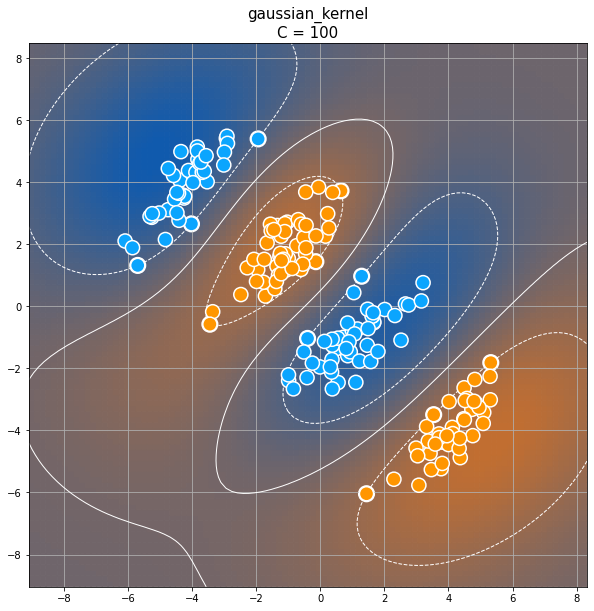

In [117]:
dual(X_train, y_train, kernel=gaussian_kernel, C=100, figsize=[10,10], fontsize=15, dotsize=200, padding=3, color_bar=False, verbose=True)

# Animation
#for c in np.logspace(-3, 1.7, 50):
#    print(c)
#    dual(X_train, y_train, kernel=gaussian_kernel, C=c, save_path='images/synth_gauss/',
#         figsize=[15,15], fontsize=15, dotsize=200, padding=2, color_bar=False, verbose=True)

### Iris data (non-separable)

     pcost       dcost       gap    pres   dres
 0:  6.1486e+03 -3.8143e+05  4e+05  1e-13  2e-13
 1: -2.9206e+02 -5.7896e+04  6e+04  6e-14  3e-13
 2: -5.4111e+03 -1.5288e+04  1e+04  4e-14  4e-13
 3: -7.2864e+03 -1.0733e+04  3e+03  3e-14  4e-13
 4: -8.0953e+03 -9.7152e+03  2e+03  5e-13  4e-13
 5: -8.4883e+03 -9.1643e+03  7e+02  1e-13  4e-13
 6: -8.7124e+03 -8.8808e+03  2e+02  2e-13  5e-13
 7: -8.7660e+03 -8.8099e+03  4e+01  2e-13  5e-13
 8: -8.7814e+03 -8.7904e+03  9e+00  4e-13  5e-13
 9: -8.7853e+03 -8.7855e+03  2e-01  1e-13  6e-13
10: -8.7854e+03 -8.7854e+03  2e-03  7e-13  6e-13
Optimal solution found.
120 support vectors out of 150 points
training accuracy: 108 out of 150


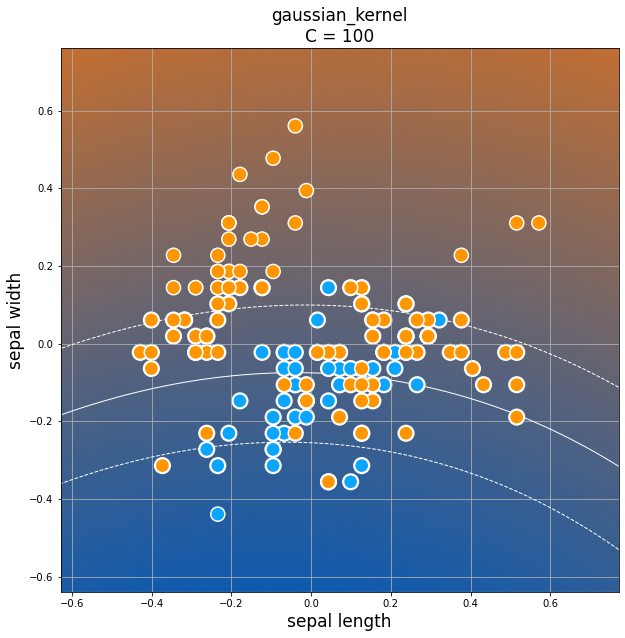

     pcost       dcost       gap    pres   dres
 0:  1.1705e+06 -3.6455e+07  4e+07  8e-12  3e-12
 1:  4.8780e+05 -5.1966e+06  6e+06  9e-12  3e-12
 2:  2.1673e+03 -6.6865e+05  7e+05  2e-12  3e-12
 3: -4.6966e+04 -1.6839e+05  1e+05  3e-12  3e-12
 4: -6.2221e+04 -1.1665e+05  5e+04  5e-13  4e-12
 5: -6.8208e+04 -9.8657e+04  3e+04  6e-12  4e-12
 6: -7.1924e+04 -9.1170e+04  2e+04  5e-12  3e-12
 7: -7.5022e+04 -8.5628e+04  1e+04  2e-12  4e-12
 8: -7.7205e+04 -8.1924e+04  5e+03  1e-12  4e-12
 9: -7.8673e+04 -7.9728e+04  1e+03  8e-13  4e-12
10: -7.9056e+04 -7.9204e+04  1e+02  9e-13  4e-12
11: -7.9120e+04 -7.9123e+04  3e+00  1e-11  5e-12
12: -7.9121e+04 -7.9122e+04  6e-02  6e-12  5e-12
Optimal solution found.
150 support vectors out of 150 points
training accuracy: 116 out of 150


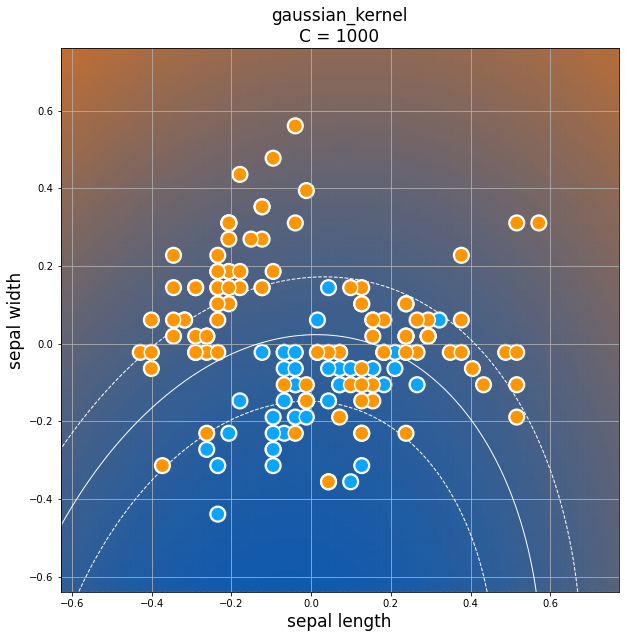

     pcost       dcost       gap    pres   dres
 0: -3.3528e+02 -9.3604e+03  1e+04  3e-01  3e-14
 1: -3.9482e+02 -1.6688e+03  1e+03  3e-03  3e-14
 2: -6.0624e+02 -9.4587e+02  3e+02  6e-04  3e-14
 3: -6.6155e+02 -8.8679e+02  2e+02  3e-04  4e-14
 4: -6.9382e+02 -8.4506e+02  2e+02  2e-04  3e-14
 5: -7.2604e+02 -7.9919e+02  7e+01  6e-05  4e-14
 6: -7.4052e+02 -7.7937e+02  4e+01  3e-05  4e-14
 7: -7.5186e+02 -7.6272e+02  1e+01  5e-06  5e-14
 8: -7.5581e+02 -7.5774e+02  2e+00  5e-07  5e-14
 9: -7.5643e+02 -7.5697e+02  5e-01  6e-08  5e-14
10: -7.5667e+02 -7.5671e+02  5e-02  6e-09  5e-14
11: -7.5669e+02 -7.5669e+02  5e-04  6e-11  5e-14
Optimal solution found.
91 support vectors out of 150 points
training accuracy: 117 out of 150


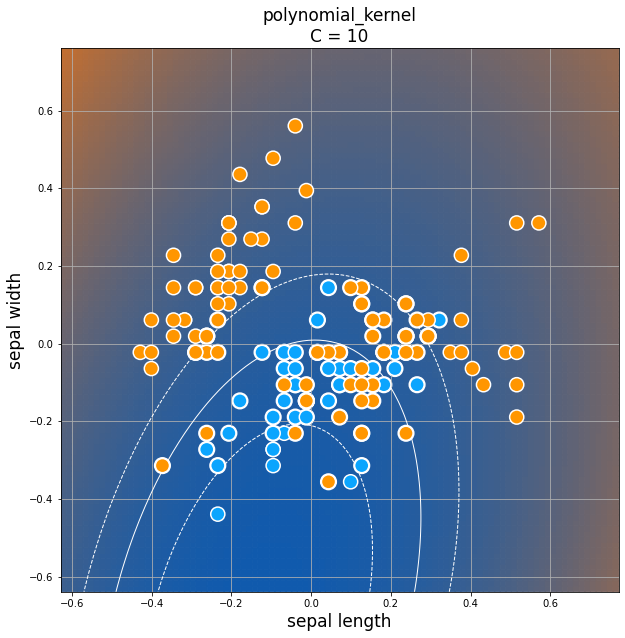

     pcost       dcost       gap    pres   dres
 0:  1.3142e+04 -7.3511e+05  1e+06  2e-01  2e-13
 1:  4.7594e+03 -8.4989e+04  9e+04  1e-02  3e-13
 2: -2.1761e+03 -2.2899e+04  2e+04  2e-03  3e-13
 3: -4.7205e+03 -1.2459e+04  8e+03  5e-04  3e-13
 4: -6.0184e+03 -8.5605e+03  3e+03  1e-04  4e-13
 5: -6.4210e+03 -8.0034e+03  2e+03  5e-05  4e-13
 6: -6.6458e+03 -7.5665e+03  9e+02  2e-05  4e-13
 7: -6.7701e+03 -7.3905e+03  6e+02  9e-06  4e-13
 8: -6.8503e+03 -7.1658e+03  3e+02  4e-07  5e-13
 9: -6.9647e+03 -7.0043e+03  4e+01  6e-09  5e-13
10: -6.9802e+03 -6.9841e+03  4e+00  6e-10  5e-13
11: -6.9818e+03 -6.9819e+03  1e-01  8e-12  5e-13
12: -6.9819e+03 -6.9819e+03  2e-03  1e-13  5e-13
Optimal solution found.
101 support vectors out of 150 points
training accuracy: 117 out of 150


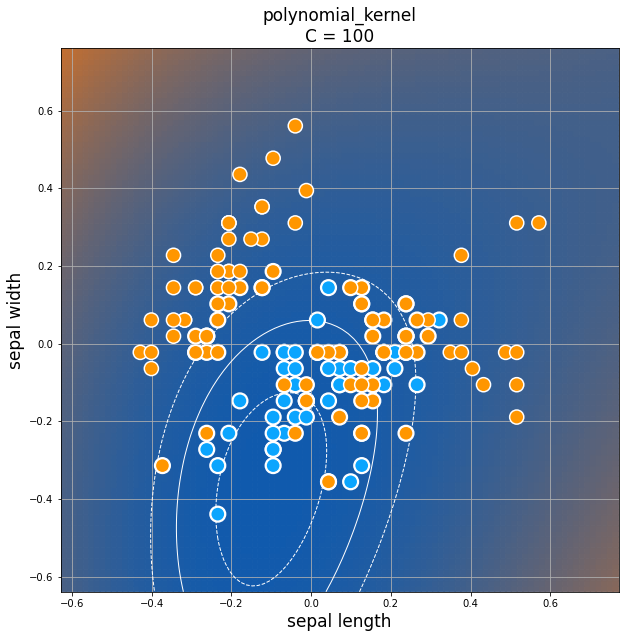

     pcost       dcost       gap    pres   dres
 0:  1.7378e+06 -7.1503e+07  1e+08  2e-01  3e-12
 1:  8.5407e+05 -7.8403e+06  9e+06  1e-02  6e-12
 2:  2.1234e+05 -2.1089e+06  2e+06  2e-03  3e-12
 3:  2.1753e+04 -7.5971e+05  8e+05  5e-04  2e-12
 4: -4.0738e+04 -2.1353e+05  2e+05  1e-12  4e-12
 5: -5.2384e+04 -1.0014e+05  5e+04  2e-12  3e-12
 6: -5.9085e+04 -7.9829e+04  2e+04  2e-12  4e-12
 7: -6.1599e+04 -7.6734e+04  2e+04  9e-12  3e-12
 8: -6.2297e+04 -7.2584e+04  1e+04  1e-12  4e-12
 9: -6.3773e+04 -7.0226e+04  6e+03  5e-12  5e-12
10: -6.5364e+04 -6.7046e+04  2e+03  6e-12  4e-12
11: -6.5818e+04 -6.6255e+04  4e+02  5e-12  4e-12
12: -6.5975e+04 -6.6012e+04  4e+01  1e-11  4e-12
13: -6.5992e+04 -6.5992e+04  7e-01  1e-11  4e-12
14: -6.5992e+04 -6.5992e+04  7e-03  1e-11  4e-12
Optimal solution found.
122 support vectors out of 150 points
training accuracy: 121 out of 150


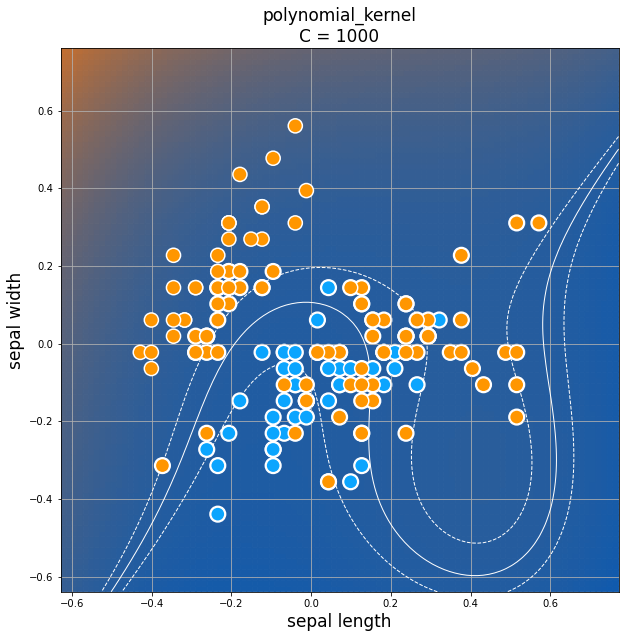

In [106]:
data = data_iris1

X = data.drop('class', axis=1)
y = data['class']

dual(X, y, kernel=gaussian_kernel, C=100, figsize=[10,10], dotsize=200, padding=0.2, save_path=None, fontsize=17)
dual(X, y, kernel=gaussian_kernel, C=1000, figsize=[10,10], dotsize=200, padding=0.2, save_path=None, fontsize=17)
dual(X, y, kernel=polynomial_kernel, C=10, figsize=[10,10], dotsize=200, padding=0.2, save_path=None, fontsize=17)
dual(X, y, kernel=polynomial_kernel, C=100, figsize=[10,10], dotsize=200, padding=0.2, save_path=None, fontsize=17)
dual(X, y, kernel=polynomial_kernel, C=1000, figsize=[10,10], dotsize=200, padding=0.2, save_path=None, fontsize=17)


     pcost       dcost       gap    pres   dres
 0:  1.7215e+06 -2.9012e+07  4e+07  7e-02  5e-13
 1:  6.9096e+05 -4.0062e+06  5e+06  7e-03  1e-12
 2:  1.5807e+05 -7.3660e+05  9e+05  5e-04  6e-13
 3:  2.5540e+04 -1.5807e+05  2e+05  4e-05  6e-13
 4: -1.0154e+04 -4.5828e+04  4e+04  9e-13  7e-13
 5: -1.5014e+04 -3.1911e+04  2e+04  2e-13  6e-13
 6: -1.6910e+04 -2.6353e+04  9e+03  3e-12  7e-13
 7: -1.8176e+04 -2.1866e+04  4e+03  1e-12  7e-13
 8: -1.9082e+04 -1.9913e+04  8e+02  3e-12  8e-13
 9: -1.9226e+04 -1.9555e+04  3e+02  5e-12  9e-13
10: -1.9289e+04 -1.9406e+04  1e+02  2e-12  8e-13
11: -1.9309e+04 -1.9368e+04  6e+01  3e-12  9e-13
12: -1.9329e+04 -1.9335e+04  5e+00  8e-12  8e-13
13: -1.9332e+04 -1.9332e+04  1e-01  9e-13  9e-13
14: -1.9332e+04 -1.9332e+04  1e-03  5e-13  8e-13
Optimal solution found.
47 support vectors out of 140 points
training accuracy: 130 out of 140


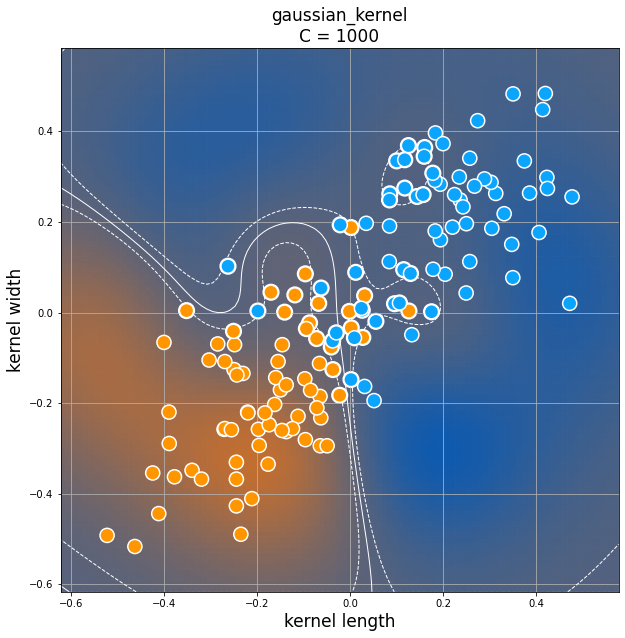

In [120]:
data = data_seeds

X = data.drop('class', axis=1)
y = data['class']

dual(X, y, kernel=gaussian_kernel, C=1000, figsize=[10,10], dotsize=200, padding=0.1, save_path=None, fontsize=17)